<a href="https://www.kaggle.com/code/ibrahimnibrahim/pcb-defect-detction?scriptVersionId=244244784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00


In [2]:
import yaml

# Read the YAML file
with open('/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Update paths
data['train'] = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/train/images'
data['val'] = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/images'
data['test'] = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/test/images'

# Save updated YAML
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data, f)

In [3]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')  # or your custom model
model.train(
    data='/kaggle/working/data.yaml',
    epochs=20,                     # Train longer (50-100 epochs)
    imgsz=640,                     # Higher resolution (↑ localization accuracy)
    device=0                        # Use GPU
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:01<00:00, 37.8MB/s]


Ultralytics 8.3.151 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 89.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 376MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.8±0.4 ms, read: 19.6±6.3 MB/s, size: 118.3 KB)


train: Scanning /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/train/labels... 6370 images, 2164 backgrounds, 0 corrupt: 100%|██████████| 8534/8534 [00:32<00:00, 266.25it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.7±6.3 MB/s, size: 134.9 KB)


val: Scanning /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/labels... 802 images, 264 backgrounds, 0 corrupt: 100%|██████████| 1066/1066 [00:03<00:00, 279.43it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.16G       2.05      2.795      1.319         19        640: 100%|██████████| 534/534 [06:45<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.03it/s]


                   all       1066       1595      0.555      0.669      0.569      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.19G      1.863      1.364       1.21         15        640: 100%|██████████| 534/534 [06:39<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]


                   all       1066       1595      0.624      0.866      0.705      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.02G      1.839      1.293      1.197         19        640: 100%|██████████| 534/534 [06:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]


                   all       1066       1595      0.653      0.785      0.697       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.17G      1.789      1.183      1.172         10        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]


                   all       1066       1595      0.723      0.857      0.838      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.06G       1.75       1.07      1.153         16        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1066       1595      0.912      0.893      0.945      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.03G      1.722     0.9812      1.143         14        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1066       1595      0.924      0.929      0.954       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.07G      1.691     0.9428      1.139         10        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1066       1595      0.889      0.883      0.937       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.04G      1.669     0.8857      1.128         10        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1066       1595      0.945      0.932      0.963      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.47G      1.662     0.8603      1.124         10        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1066       1595      0.965      0.931      0.976      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.07G      1.631      0.819      1.112         16        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1066       1595      0.962      0.959      0.977      0.524


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.07G      1.618     0.7698      1.149          7        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1066       1595       0.97      0.964      0.978      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.04G      1.603     0.7302      1.145          9        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1066       1595      0.973      0.977       0.98      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.06G       1.59     0.7149      1.144          8        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1066       1595      0.973      0.977      0.979      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.03G      1.568      0.683      1.135          9        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1066       1595      0.976      0.973      0.983      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.06G      1.556     0.6673       1.13          7        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1066       1595      0.979      0.981      0.984      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.04G      1.533     0.6455      1.119          5        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       1066       1595      0.973      0.983      0.981      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.06G      1.515     0.6296      1.116         11        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1066       1595      0.977      0.982      0.983       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.04G      1.493     0.6088      1.107          6        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       1066       1595      0.977      0.985      0.984      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.06G      1.476     0.5984      1.096          5        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]


                   all       1066       1595      0.973      0.986      0.984      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.04G      1.455     0.5859      1.096          3        640: 100%|██████████| 534/534 [06:36<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]


                   all       1066       1595      0.978      0.985      0.986      0.574

20 epochs completed in 2.302 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.02it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1066       1595      0.978      0.985      0.986      0.575
            mouse_bite        140        280      0.982      0.991      0.986       0.59
                  spur        130        262       0.97      0.982      0.987      0.545
          missing_hole        118        229      0.991          1      0.995      0.635
                 short        158        327      0.969      0.972      0.981      0.566
          open_circuit        135        259      0.973      0.981      0.989       0.55
       spurious_copper        121        238      0.983      0.984       0.98      0.562
Speed: 0.2ms preprocess, 12.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x795608bb33d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [4]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
metrics = model.val()

Ultralytics 8.3.151 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 86.1±33.2 MB/s, size: 88.8 KB)


val: Scanning /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/labels... 802 images, 264 backgrounds, 0 corrupt: 100%|██████████| 1066/1066 [00:01<00:00, 610.46it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:17<00:00,  3.73it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1066       1595      0.978      0.985      0.986      0.576
            mouse_bite        140        280      0.982      0.991      0.986      0.592
                  spur        130        262       0.97      0.982      0.988      0.548
          missing_hole        118        229      0.991          1      0.995      0.638
                 short        158        327      0.969      0.972      0.981      0.567
          open_circuit        135        259      0.973      0.981      0.989      0.553
       spurious_copper        121        238      0.983      0.984       0.98      0.561
Speed: 0.4ms preprocess, 13.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


In [5]:
print(f"mAP50-95: {metrics.box.map:.4f}")  
print(f"mAP50: {metrics.box.map50:.4f}")    
print(f"Precision: {metrics.box.p.mean():.4f}") 
print(f"Recall: {metrics.box.r.mean():.4f}")   
print(f"F1-score: {metrics.box.f1.mean():.4f}") 

mAP50-95: 0.5765
mAP50: 0.9863
Precision: 0.9780
Recall: 0.9850
F1-score: 0.9815



image 1/1 /kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/images/l_light_01_spur_05_3_600.jpg: 640x640 1 spur, 16.0ms
Speed: 3.5ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


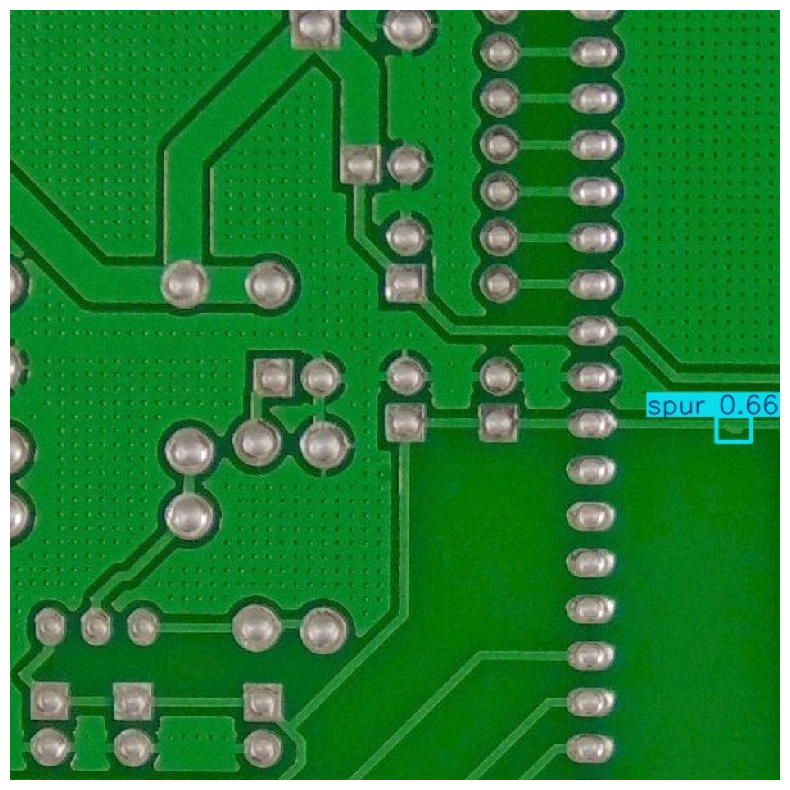

In [6]:
import cv2
from matplotlib import pyplot as plt

image_path = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/images/l_light_01_spur_05_3_600.jpg'

results = model.predict(source=image_path, conf=0.5, save=True)

# Get the actual saved image path (not just directory)
predicted_image_path = f"{results[0].save_dir}/{image_path.split('/')[-1]}"

# Read and display
predicted_image = cv2.cvtColor(cv2.imread(predicted_image_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(predicted_image)
plt.axis('off')
plt.show()